# Zero Padding

*Zero padding* is the processes of appending zeros to the end of an input sequence to increase the frequency resolution of the DFT. The more zeros that are added to the end of the input sequence, the closer the DFT will approximate the CFT (continuous Fourier transform). If we perform zero padding on *L* non-zero input samples to get a total of *N* input samples and then we take the *N*-point DFT, the zero padded DFT output bin center frequencies are still related to the original sample rate $F_s$ by the equation:

$$f_{center} = \frac{m \, F_s}{N}$$

where $m$ is the index in the DFT output of the center frequency.

Some important things to note when zero padding the input sequence are:
1. The DFT magnitude is a function of the number of non-zero input samples, not the zero padded input length. When calculating the DFT magnitude for a real sinusoid at bin center, the magnitude is: $$M_r = A_0 \frac{L}{2}$$ When calculating the DFT magnitude for a complex sinusoid at bin center, the magnitude is: $$M_c = A_0 \, L$$
1. When applying windowing to the input sequence, the window must be applied *before* the zero padding is applied. Applying a window to a sequence that has already been zero padded will zero out and distort part of the window function, leading to erroneous results.<br><br>
1. Zero padding the input sequence does *not* improve our ability to distinguish between two closely spaced signals in the frequency domain. It only gives us more resolution as to what the CFT looks like. The main and sidelobes do not change in width (when measured in Hz). To improve true spectral resolution, we must have more non-zero samples in the input sequence. A golden rule is that you must collect $\frac{1}{F_{res}}$ seconds of data to have a spectral resolution of $F_{res}$ Hz.

Illustrated below is an example of how zero padding increase the resolution of the DFT output, making it a better approximation of the CFT. Also notice that after a certain point, adding more zeros doesn't give us much improvement on approximating the CFT. 

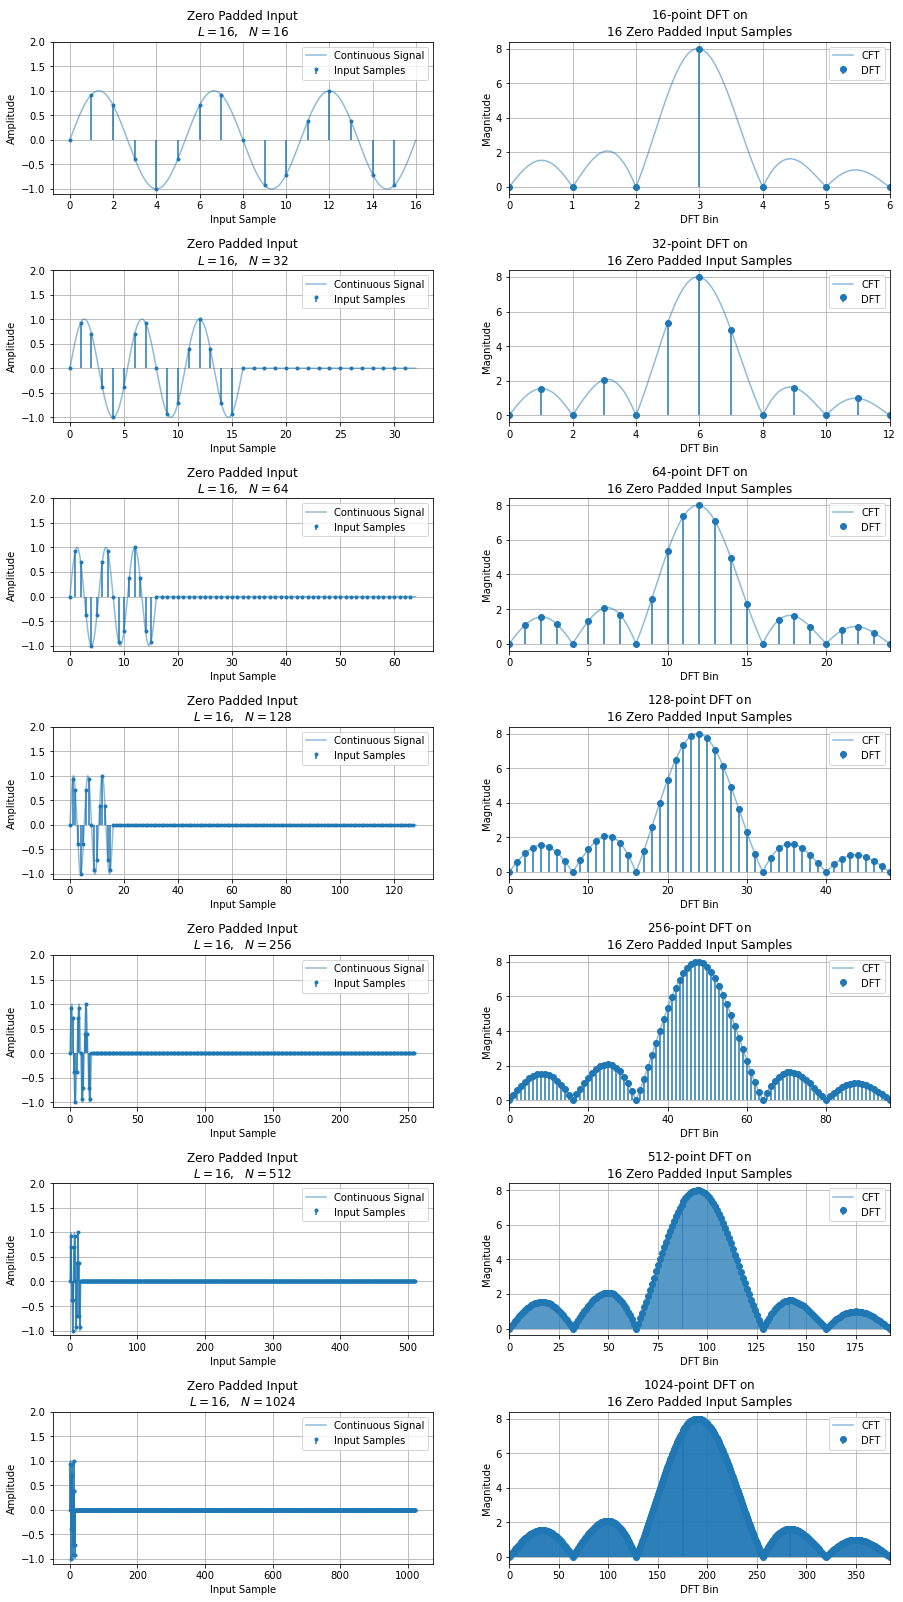

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Number of non zero input samples
L = 16
l = np.arange(0,L)

# Number of non zero input samples used to simulate continuous time for the plots
cont_scale_fact = 128
L_cont = L * cont_scale_fact
l_cont = np.arange(0,L_cont)

# Sinusoidal input parameters 
A0 = 1
k = 3 
theta = 0

# Approximate the CFT of the input sequence 
# (used for plot overlay on frequency-domain plot)
N_cft = 256
Z_cft = N_cft - L
x_in = A0 * np.sin(2*np.pi*k*l/L + theta)
x_in_zp = np.concatenate((x_in, np.zeros(Z_cft)))
x_cft = fft(x_in_zp)

# Number of input samples to use for DFT calculations 
N_list = [16, 32, 64, 128, 256, 512, 1024]

fig, ax = plt.subplots(nrows=len(N_list), ncols=2, figsize=(15, 4*len(N_list)))

# Plot time domain and frequency domain for zero padded input data
for idx, N in enumerate(N_list):

    N_cont = N * cont_scale_fact

    # Number of zero padded samples
    Z = N - L
    Z_cont = N_cont - L_cont

    # Calculate FFT of zero padded input
    x_in = A0 * np.sin(2*np.pi*k*l/L + theta)
    x_in_zp = np.concatenate((x_in, np.zeros(Z)))
    x_fft_zp = fft(x_in_zp)
    x_in_cont = A0 * np.sin(2*np.pi*k*l_cont/L_cont + theta)
    x_in_zp_cont = np.concatenate((x_in_cont, np.zeros(Z_cont)))
    x_fft_zp_cont = fft(x_in_zp_cont)

    # Plot time domain zero padded data
    ax[idx][0].grid()
    ax[idx][0].plot(np.arange(0,N_cont)/cont_scale_fact, x_in_zp_cont, alpha=0.5, label='Continuous Signal')
    ax[idx][0].stem(np.arange(0,N), x_in_zp, basefmt= ' ', markerfmt='C0.', label='Input Samples')
    ax[idx][0].set_ylim(top=2)
    ax[idx][0].set_xlabel('Input Sample')
    ax[idx][0].set_ylabel('Amplitude')
    ax[idx][0].set_title('Zero Padded Input\n$L={}$,   $N={}$'.format(L,N))
    ax[idx][0].legend()

    # Plot frequency domain zero padded data
    ax[idx][1].grid()
    ax[idx][1].plot(np.arange(0,N_cft)/(N_cft/N), np.abs(x_cft), alpha=0.5, label='CFT')
    ax[idx][1].stem(np.arange(0,N), np.abs(x_fft_zp), basefmt= ' ', label='DFT')
    ax[idx][1].set_xlim((0,2*k*N/L))
    ax[idx][1].set_xlabel('DFT Bin')
    ax[idx][1].set_ylabel('Magnitude')
    ax[idx][1].set_title('${0}$-point DFT on\n{1} Zero Padded Input Samples'.format(N,L))
    ax[idx][1].legend()
 
plt.subplots_adjust(hspace=0.5)
pass